<a href="https://colab.research.google.com/github/minhhung250302/TrinhMinhHungUTE/blob/main/khuonmat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Trịnh Minh Hưng 

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/BTVN/khuon mat

/content/drive/MyDrive/Colab Notebooks/BTVN/khuon mat


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN/khuon mat/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 99 images belonging to 3 classes.


In [ ]:
training_set.class_indices

{'Hung1': 0, 'Hung2': 1, 'Vu': 2}

In [ ]:
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN/khuon mat/val',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 47 images belonging to 3 classes.


In [ ]:
validation.class_indices

{'Hung1': 0, 'Hung2': 1, 'Vu': 2}

In [ ]:

model= Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))

model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(training_set,epochs=30,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/30
4/4 [==============================] - 62s 18s/step - loss: 12.7609 - accuracy: 0.2828 - val_loss: 3.5486 - val_accuracy: 0.4468
Epoch 2/30
4/4 [==============================] - 23s 6s/step - loss: 2.5533 - accuracy: 0.3535 - val_loss: 0.8802 - val_accuracy: 0.5745
Epoch 3/30
4/4 [==============================] - 28s 9s/step - loss: 0.9308 - accuracy: 0.5354 - val_loss: 0.6618 - val_accuracy: 0.7660
Epoch 4/30
4/4 [==============================] - 26s 6s/step - loss: 0.5233 - accuracy: 0.7374 - val_loss: 0.2810 - val_accuracy: 0.9787
Epoch 5/30
4/4 [==============================] - 25s 5s/step - loss: 0.1755 - accuracy: 0.9899 - val_loss: 0.1424 - val_accuracy: 0.9787
Epoch 6/30
4/4 [==============================] - 24s 6s/step - loss: 0.3416 - accuracy: 0.8889 - val_loss: 0.1595 - val_accuracy: 0.9787
Epoch 7/30
4/4 [==============================] - 24s 6s/step - loss: 0.2937 - accuracy: 0.8586 - val_loss: 0.1357 - val_accuracy: 0.9787
Epoch 8/30
4/4 [================

In [ ]:
Score=model.evaluate(training_set,verbose=0)
print('Train Sai ', Score[0])
print('Chính xác ', Score[1])

Train Sai  1.9193344996892847e-05
Chính xác  1.0


In [ ]:
model.save("nhandienkhuonmat.h5")

In [ ]:
model_ANN=load_model('nhandienkhuonmat.h5')

1/1 [==============================] - 0s 301ms/step
Hung2


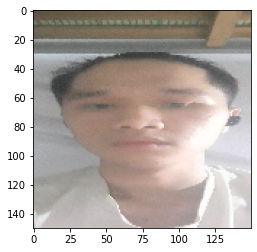

In [ ]:
img=load_img('/content/z3900054880142_4ff5c2f45202af635bb7e5f82e321d41.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_ANN.predict(img)
if round(result[0][0])==1:
  prediction='Hung1'
if round(result[0][1])==1:
  prediction='Hung2'
if round(result[0][2])==1:
  prediction='Vu'
print(prediction)

1/1 [==============================] - 0s 42ms/step
Vu


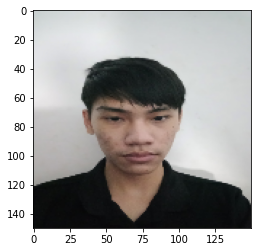

In [ ]:
img=load_img('/content/z3899383391519_aa16a4868043f53304ea864cfa8d9fe5.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_ANN.predict(img)
if round(result[0][0])==1:
  prediction='Hung1'
if round(result[0][1])==1:
  prediction='Hung2'
if round(result[0][2])==1:
  prediction='Vu'
print(prediction)

1/1 [==============================] - 0s 108ms/step
Hung1


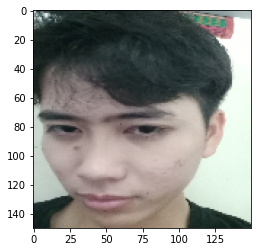

In [ ]:
img=load_img('/content/IMG_20221114_232505.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_ANN.predict(img)
if round(result[0][0])==1:
  prediction='Hung1'
if round(result[0][1])==1:
  prediction='Hung2'
if round(result[0][2])==1:
  prediction='Vu'
print(prediction)